In [117]:
import numpy as np
import pandas as pd
import copy

In [118]:
train_raw = pd.read_csv('train.csv')

In [119]:
train_raw.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

In [120]:
train_raw['Choice'].mean()

0.5094545454545455

In [143]:
train_raw

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0,41765,185,1356,1529.643058,282.858500,76.809514,5.392171,104.438625,3307,...,1370,15143,6881.482996,5013.642295,22.683131,2.385538,18.420981,23958,21.324988,1413.825398
5496,1,112,243,5,1.445174,0.100503,0.100503,0.100503,0.603177,5,...,479,8,0.306073,0.306073,0.100503,0.100503,1.621981,1,49.000000,4969.000000
5497,0,15385,673,747,55.993546,22.321945,6.946233,0.341936,6.503977,202,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907
5498,0,265258,209,551,631.915946,457.648550,5.460985,0.100503,7.498126,2603,...,37601,22232,176.533716,42.330221,6.849227,1.345073,4.359865,696,234.338068,7168.464489


In [121]:
train_df = copy.deepcopy(train_raw[['Choice']])

In [122]:
train_df['follower_count'] = train_raw['A_follower_count'] - train_raw['B_follower_count']
train_df['following_count'] = train_raw['A_following_count'] - train_raw['B_following_count']
train_df['listed_count'] = train_raw['A_listed_count'] - train_raw['B_listed_count']
train_df['mentions_received'] = train_raw['A_mentions_received'] - train_raw['B_mentions_received']
train_df['retweets_received'] = train_raw['A_retweets_received'] - train_raw['B_retweets_received']
train_df['mentions_sent'] = train_raw['A_mentions_sent'] - train_raw['B_mentions_sent']
train_df['retweets_sent'] = train_raw['A_retweets_sent'] - train_raw['B_retweets_sent']
train_df['posts'] = train_raw['A_posts'] - train_raw['B_posts']
train_df['network_feature_1'] = train_raw['A_network_feature_1'] - train_raw['B_network_feature_1']
train_df['network_feature_2'] = train_raw['A_network_feature_2'] - train_raw['B_network_feature_2']
train_df['network_feature_3'] = train_raw['A_network_feature_3'] - train_raw['B_network_feature_3']

In [123]:
train_df

,Choice,follower_count,following_count,listed_count,mentions_received,retweets_received,mentions_sent,retweets_sent,posts,network_feature_1,network_feature_2,network_feature_3
0,0,-34235,-29506,-1686,-14.846518,-3.883525,-8.103828,-0.231920,-6.626665,-64,90.969697,9438.106061
1,0,-17671,331,-1382,49.961485,16.854685,2.481652,0.546816,4.106299,206,-113.587704,-1601.149290
2,0,3688,733,-105,24.768949,9.201969,4.758317,0.490702,2.986516,92,58.594502,5722.563574
3,0,-19542,-17630,-276,-565.184032,-390.016375,-26.220532,-7.067053,-29.271279,-1756,-21.469296,-1299.678967
4,1,38035,-849,2460,127.252413,33.417223,21.117111,2.213765,19.298035,466,78.904293,840.220036
...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0,-762629,-1185,-13787,-5351.839938,-4730.783795,54.126383,3.006633,86.017644,-20651,28.807054,2171.964468
5496,1,-682,-236,-3,1.139100,-0.205570,0.000000,0.000000,-1.018804,4,47.600000,-3554.800000
5497,0,7831,-1038,566,34.391680,18.740284,0.181576,-0.777790,1.940731,117,103.995098,1292.989740
5498,0,-57424,-37392,-21681,455.382230,415.318328,-1.388242,-1.244570,3.138261,1907,-230.511754,-6661.772353


In [124]:
train_df.corr().unstack().sort_values(ascending=False).head(20)

network_feature_3  network_feature_3    1.000000
network_feature_2  network_feature_2    1.000000
follower_count     follower_count       1.000000
following_count    following_count      1.000000
listed_count       listed_count         1.000000
mentions_received  mentions_received    1.000000
retweets_received  retweets_received    1.000000
mentions_sent      mentions_sent        1.000000
retweets_sent      retweets_sent        1.000000
posts              posts                1.000000
network_feature_1  network_feature_1    1.000000
Choice             Choice               1.000000
retweets_received  mentions_received    0.988363
mentions_received  retweets_received    0.988363
retweets_received  network_feature_1    0.920574
network_feature_1  retweets_received    0.920574
                   mentions_received    0.914479
mentions_received  network_feature_1    0.914479
listed_count       follower_count       0.781208
follower_count     listed_count         0.781208
dtype: float64

In [125]:
train_df = train_df.drop(columns=['mentions_received', 'network_feature_1'])

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = train_df['Choice']
X = train_df.drop(columns=['Choice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 110)

In [246]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [247]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train_scaled)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.610310
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Choice   No. Observations:                 4125
Model:                          Logit   Df Residuals:                     4116
Method:                           MLE   Df Model:                            8
Date:                Thu, 06 Feb 2020   Pseudo R-squ.:                  0.1192
Time:                        18:12:11   Log-Likelihood:                -2517.5
converged:                       True   LL-Null:                       -2858.3
Covariance Type:            nonrobust   LLR p-value:                6.909e-142
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            11.0879      2.221      4.992      0.000       6.734      15.441
x2            -0.6939      1.

In [279]:
def make_predictions(s):
    if s >= 0.5:
        return 1
    return 0

train_predictions = pd.Series(result.predict(X_train_scaled))
train_predictions = train_predictions.map(make_predictions)
train = confusion_matrix(y_train, train_predictions)

test_predictions = pd.Series(result.predict(X_test_scaled))
test_predictions = test_predictions.map(make_predictions)
test = confusion_matrix(y_test, test_predictions)

print("Training set confustion matrix:\n", train)
print("\nTest set confustion matrix:\n", test)

print("\nTraining set accuracy:", (train[0][0] + train[1][1])/(sum(train[0])+ sum(train[1])))
print("Test set accuracy:", (test[0][0] + test[1][1])/(sum(test[0])+ sum(test[1])))

Training set confustion matrix:
 [[1319  699]
 [ 488 1619]]

Test set confustion matrix:
 [[451 229]
 [149 546]]

Training set accuracy: 0.7122424242424242
Test set accuracy: 0.7250909090909091


In [272]:
out = pd.DataFrame({'coefficients': result.params.values, 'p-values': result.pvalues.values}, index = X_train.columns)
out['magnitude'] = out['coefficients'].abs()
out.sort_values(by = ['magnitude'], ascending = False, inplace = True)
out

,coefficients,p-values,magnitude
retweets_received,-75.384021,8.481768e-74,75.384021
listed_count,58.128448,1.944130e-33,58.128448
follower_count,11.087859,5.983042e-07,11.087859
network_feature_3,2.858370,1.147292e-04,2.858370
retweets_sent,1.913395,9.614698e-04,1.913395
mentions_sent,1.754485,1.871340e-03,1.754485
posts,1.206705,5.602249e-02,1.206705
following_count,-0.693924,4.940719e-01,0.693924
network_feature_2,0.543859,4.967619e-01,0.543859


In [276]:
out['coefficients'].iloc[:4] / abs(out['coefficients'].iloc[:4].sum())

retweets_received   -22.779148
listed_count         17.564949
follower_count        3.350471
network_feature_3     0.863727
Name: coefficients, dtype: float64

In [ ]:
# END

In [ ]:
# STOP HERE

In [170]:
train = confusion_matrix(y_train, train_predictions)

In [154]:
(1335 + 1584)/(1335+691+515+1584)

0.7076363636363636

In [158]:
test_predictions = pd.Series(result.predict(X_test_scaled))
test_predictions = test_predictions.map(make_predictions)

In [163]:
test = confusion_matrix(y_test, test_predictions)

In [161]:
(450+529)/(450+222+174+529)

0.712

In [171]:
print("Train set accuracy:", (train[0][0] + train[1][1])/(sum(train[0])+ sum(train[1])))
print("Test set accuracy:", (test[0][0] + test[1][1])/(sum(test[0])+ sum(test[1])))

Train set accuracy: 0.7076363636363636
Test set accuracy: 0.712


In [128]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print('Train:', clf.score(X_train_scaled, y_train))
print('Test:', clf.score(X_test_scaled, y_test))

Train: 0.6863030303030303
Test: 0.6843636363636364


/Users/christopherkreke/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [129]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

array([[502, 170],
       [169, 534]])

In [142]:
pd.DataFrame(clf.coef_[0], index = X_train.columns).sort_values(by=0, ascending = False)

,0
follower_count,5.491357
retweets_sent,3.122818
listed_count,2.569516
network_feature_3,1.901778
mentions_sent,1.701726
network_feature_2,1.501022
posts,0.766630
following_count,0.219880
retweets_received,-2.770164


In [137]:
clf.

NameError: name 'summary' is not defined

Text(0.5, 0, 'Relative Feature Importance')

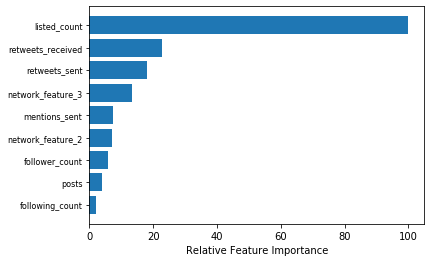

In [67]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

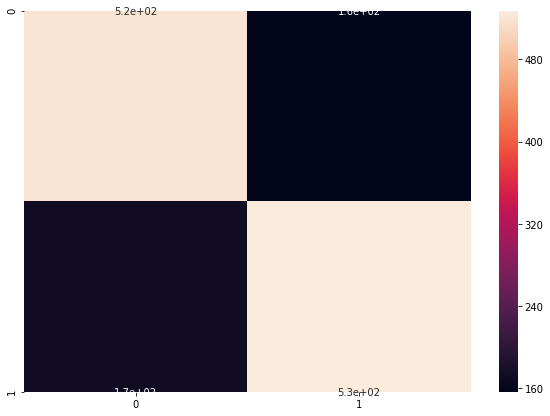

In [21]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_test, clf.predict(X_test)), annot=True)